In [1]:
import builtins
original_print = print
def custom_print(*args, **kwargs):
    new_args = []
    for arg in args:
        if isinstance(arg, float):
            new_args.append(f'{arg:.10f}')
        else:
            new_args.append(arg)
    original_print(*new_args, **kwargs)
builtins.print = custom_print

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

    Year      TH/J
0   2011  0.000002
1   2012  0.000032
2   2013  0.000564
3   2014  0.000815
4   2015  0.001872
5   2016  0.003441
6   2017  0.005339
7   2018  0.007082
8   2019  0.010182
9   2020  0.006350
10  2021  0.010182
11  2022  0.007582
12  2023  0.006601


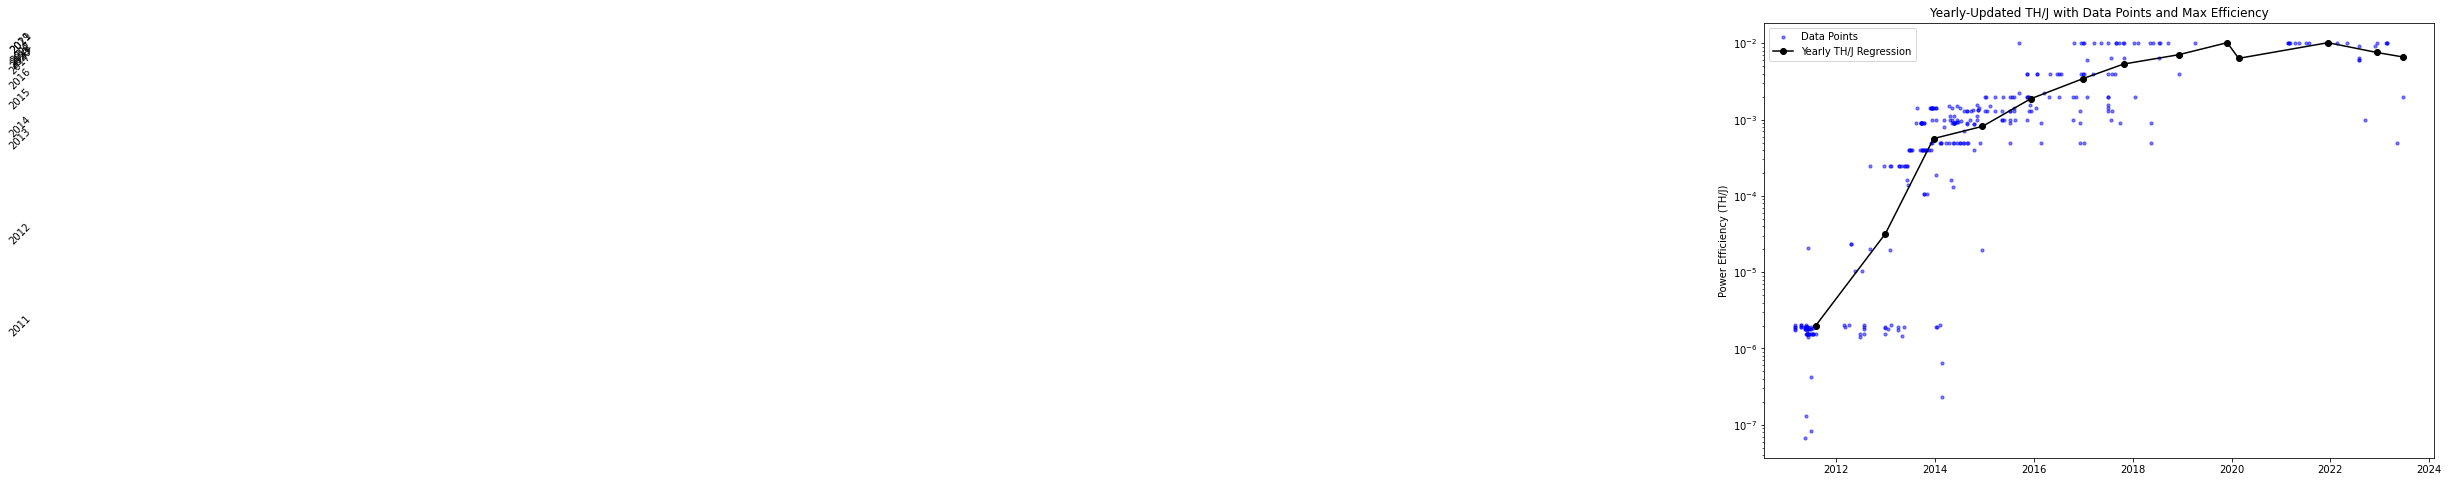

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the variable name for the unit power efficiency column
unit_power_efficiency = 'TH/J'

# Load the data for the maximum efficiency for all dates
max_efficiency_table = pd.read_csv('../hardwarelist/Bitcoin max updated2.csv')

# Assuming the 'Date' column in max_efficiency_table is in a format that can be converted to datetime
max_efficiency_table['Date'] = pd.to_datetime(max_efficiency_table['Date'])

# Load your data from the CSV file
data = pd.read_csv('datasets/extracted/final3.csv')

# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column and create a new column 'year'
data['year'] = data['date'].dt.year

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Extract years from the data
years = data['year'].unique()

# Initialize lists to store yearly 'TH/J' values
th_j_values = []

# Create an empty array to store the regression lines
regression_lines = []

# Iterate over each year, calculate the slope, and store the data
for year in years:
    # Filter data for the current year
    yearly_data = data[data['year'] == year]

    # Fit a linear regression model
    model = LinearRegression()
    X = np.arange(len(yearly_data)).reshape(-1, 1)
    y = yearly_data[unit_power_efficiency]
    model.fit(X, y)

    # Calculate the mean 'TH/J' value for the year
    th_j_mean = yearly_data[unit_power_efficiency].mean()

    # Store the yearly 'TH/J' value
    th_j_values.append(th_j_mean)

    # Store the regression line for the year (point at the end of the year)
    end_of_year_date = yearly_data['date'].max()
    regression_lines.append((end_of_year_date, th_j_mean))

# Create a DataFrame to store the yearly 'TH/J' values and regression points
results = pd.DataFrame({'Year': years, unit_power_efficiency: th_j_values})

# Print the yearly 'TH/J' values
print(results)

# Scatter plot for all data points
plt.scatter(data['date'], data[unit_power_efficiency], c='blue', s=10, label='Data Points', alpha=0.5)

# Plot the regression lines (one point per year)
regression_dates, regression_th_j_values = zip(*regression_lines)
plt.plot(regression_dates, regression_th_j_values, marker='o', linestyle='-', color='black', label=f'Yearly {unit_power_efficiency} Regression')

# Plot the Hardware (TH/J) line
# plt.plot(max_efficiency_table['Date'], max_efficiency_table['MAX Hardware (TH/J)'], color='red', label='Hardware (TH/J)', linewidth=2)
# plt.plot(max_efficiency_table['Date'], max_efficiency_table['Hardware (TH/J)'], color='red', label='Hardware (TH/J)', linewidth=2)

# Plot the Hardware with Archaicity (TH/J) line
# plt.plot(max_efficiency_table['Date'], max_efficiency_table['UPDATED Hardware with Archaicity (TH/J)'].astype(float), color='green', label='Hardware with Archaicity (TH/J)', linewidth=2)
# plt.plot(max_efficiency_table['Date'], max_efficiency_table['Hardware with Archaicity (TH/J)'], color='green', label='Hardware with Archaicity (TH/J)', linewidth=2)

plt.yscale('log')  # Set the y-axis to a logarithmic scale base 10

# Add year labels with angled text
for year, th_j_value in zip(years, regression_th_j_values):
    plt.text(year, th_j_value, str(year), rotation=45, ha='right', va='center', fontsize=10)

plt.ylabel('Power Efficiency (' + unit_power_efficiency + ')')
plt.title(f'Yearly-Updated {unit_power_efficiency} with Data Points and Max Efficiency')
plt.legend(loc='upper left')
plt.yticks()
plt.tight_layout()
plt.show()

In [3]:
# looks like:
# [
#  (Timestamp('2011-08-04 00:00:00'), 1.9952745454545455e-06),
#  (Timestamp('2012-12-31 00:00:00'), 3.2042489473684216e-05),
#  (Timestamp('2013-12-21 00:00:00'), 0.0005635879322033898)
# ]
regression_lines

[(Timestamp('2011-08-04 00:00:00'), 1.9952745454545455e-06),
 (Timestamp('2012-12-31 00:00:00'), 3.2042489473684216e-05),
 (Timestamp('2013-12-21 00:00:00'), 0.0005635879322033898),
 (Timestamp('2014-12-18 00:00:00'), 0.0008150532636363637),
 (Timestamp('2015-12-09 00:00:00'), 0.001871942857142857),
 (Timestamp('2016-12-30 00:00:00'), 0.0034413043478260874),
 (Timestamp('2017-10-25 00:00:00'), 0.005338777777777777),
 (Timestamp('2018-12-07 00:00:00'), 0.00708175),
 (Timestamp('2019-11-30 00:00:00'), 0.010182),
 (Timestamp('2020-02-23 00:00:00'), 0.00635),
 (Timestamp('2021-12-14 00:00:00'), 0.010181999999999998),
 (Timestamp('2022-12-09 00:00:00'), 0.007581777777777777),
 (Timestamp('2023-06-24 00:00:00'), 0.0066006)]

In [7]:
df = pd.DataFrame(columns=['date', 'max possible', 'archaicity', 'max found', 'regression'])
df['date'] = max_efficiency_table['Date']
df['max possible'] = max_efficiency_table['MAX Hardware (TH/J)']
df['archaicity'] = max_efficiency_table['UPDATED Hardware with Archaicity (TH/J)']


# finds the 2 closest timestamps in regression_lines and returns the interpolated value
def get_regression(date):
    closest_smaller_timestamp_index = None
    closest_larger_timestamp_index = None
    for (i,(timestamp, value)) in enumerate(regression_lines):
        if timestamp <= date:
            closest_smaller_timestamp_index = i
        else:
            closest_larger_timestamp_index = i
            break
    
    if closest_smaller_timestamp_index is None:
        return regression_lines[0][1]
    elif closest_larger_timestamp_index is None:
        return regression_lines[-1][1]
    
    smaller_value = regression_lines[closest_smaller_timestamp_index][1]
    larger_value = regression_lines[closest_larger_timestamp_index][1]

    # interpolate
    return smaller_value + (larger_value - smaller_value) * (date - regression_lines[closest_smaller_timestamp_index][0]) / (regression_lines[closest_larger_timestamp_index][0] - regression_lines[closest_smaller_timestamp_index][0])

     
df['regression'] = df['date'].apply(get_regression)

# gets the max efficiency for a given date from the data table
def get_max_efficiency(date):
    return data[data['date'] == date][unit_power_efficiency].max()

df['max found'] = df['date'].apply(get_max_efficiency)

In [9]:
df.sample(30)

,date,max possible,archaicity,max found,regression
2341,2015-05-31,0.005350,0.002000,NaN,0.001302
3323,2018-02-06,0.010200,0.010200,NaN,0.005783
11,2009-01-12,0.000001,0.000001,NaN,0.000002
2499,2015-11-05,0.007140,0.005350,NaN,0.001771
2705,2016-05-29,0.007140,0.005350,NaN,0.002569
4753,2022-01-06,0.033900,0.033900,NaN,0.010016
2238,2015-02-17,0.005350,0.001430,NaN,0.000996
2032,2014-07-26,0.003160,0.000400,0.000500,0.000714
3036,2017-04-25,0.010200,0.010200,NaN,0.004177
4863,2022-04-26,0.033900,0.033900,NaN,0.009221


In [10]:
df.to_csv('plot.csv', index=False)